## PCA analysis with crab dataset

Description: The crabs data frame has 200 rows and 8 columns,
describing 5 morphological measurements on 50 crabs each of
two colour forms and both sexes, of the species Leptograpsus
variegatus collected at Fremantle, W. Australia.

**Format**: The dataframe contains the following columns:

- sp species - "B" or "O" for blue or orange
- sex as it says
- index index 1:50 within each of the four groups
- FL frontal lobe size (mm)
- RW rear width (mm)
- CL carapace length (mm)
- CW carapace width (mm)
- BD body depth (mm)

**Summary**

After a first explorative analysis, we perform PCA in three different cases:

- untouched dataset (all the columns are present)
- dataset without gender and species (we exclude the sex and sp columns)
- dataset without only species (excluding sp column)

The **second case** is particularly interesting and it gives the best results.

Indeed, by considering the most relevant directions we find that the two species group themselves in two well-separated clusters. 
Concerning the gender, we obtain a relevant two-clusters grouping. However, the separation between groups is not perfectly marked.

## Introduction 

- importing libraries
- reading csv
- exploratory analysis
- normalization and binning

In [180]:
# Libraries and Magic

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [181]:
!ls

Iris_dataset.csv
Iris_dataset_description.txt
PCA and visualization - a demo analysis.ipynb
Stat_PCA_Iris_tutorial.ipynb
crabs.csv
tutorials_stat.ipynb
wine_data.csv
wine_data_description.txt


In [182]:
# read csv 

dfcrab0 = pd.read_csv('crabs.csv', encoding = "ISO-8859-1")

dfcrab0.head()

,Unnamed: 0,sp,sex,index,FL,RW,CL,CW,BD
0,1,B,M,1,8.1,6.7,16.1,19.0,7.0
1,2,B,M,2,8.8,7.7,18.1,20.8,7.4
2,3,B,M,3,9.2,7.8,19.0,22.4,7.7
3,4,B,M,4,9.6,7.9,20.1,23.1,8.2
4,5,B,M,5,9.8,8.0,20.3,23.0,8.2


In [183]:
# deleting "Unnamed: 0" and "index" columns

dfcrab = dfcrab0.copy().drop(["Unnamed: 0","index"],axis=1)
dfcrab.head()

,sp,sex,FL,RW,CL,CW,BD
0,B,M,8.1,6.7,16.1,19.0,7.0
1,B,M,8.8,7.7,18.1,20.8,7.4
2,B,M,9.2,7.8,19.0,22.4,7.7
3,B,M,9.6,7.9,20.1,23.1,8.2
4,B,M,9.8,8.0,20.3,23.0,8.2


#### Preliminary analysis

- syntesis with describe()
- graphical with seaborn boxplot

In [184]:
dfcrab.describe()

,FL,RW,CL,CW,BD
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,15.583000,12.73850,32.105500,36.414500,14.030500
std,3.495325,2.57334,7.118983,7.871955,3.424772
min,7.200000,6.50000,14.700000,17.100000,6.100000
25%,12.900000,11.00000,27.275000,31.500000,11.400000
50%,15.550000,12.80000,32.100000,36.800000,13.900000
75%,18.050000,14.30000,37.225000,42.000000,16.600000
max,23.100000,20.20000,47.600000,54.600000,21.600000


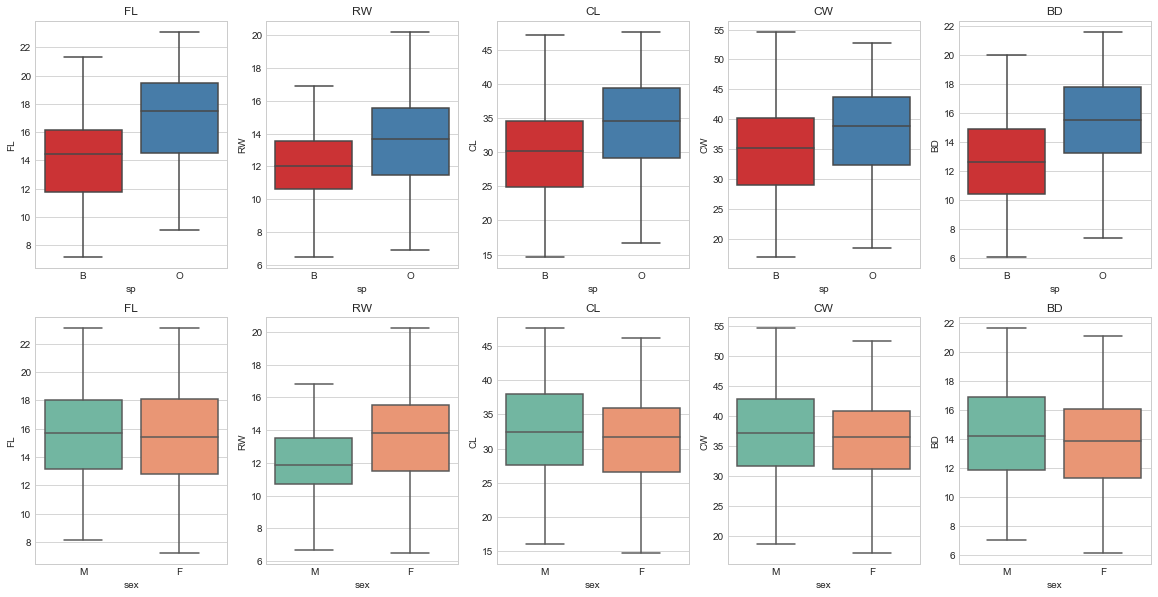

In [185]:
sns.set_style("whitegrid")

f, axes = plt.subplots(2, 5, figsize=(20,10))
i = 0
for c in dfcrab.columns[2:]:
    sns.boxplot(x="sp", y=c, palette="Set1", data=dfcrab\
                , ax=axes[0,i]).set_title(c)
    i += 1

i=0
for c in dfcrab.columns[2:]:
    sns.boxplot(x="sex", y=c, palette="Set2", data=dfcrab\
                , ax=axes[1,i]).set_title(c)
    i += 1

plt.show()

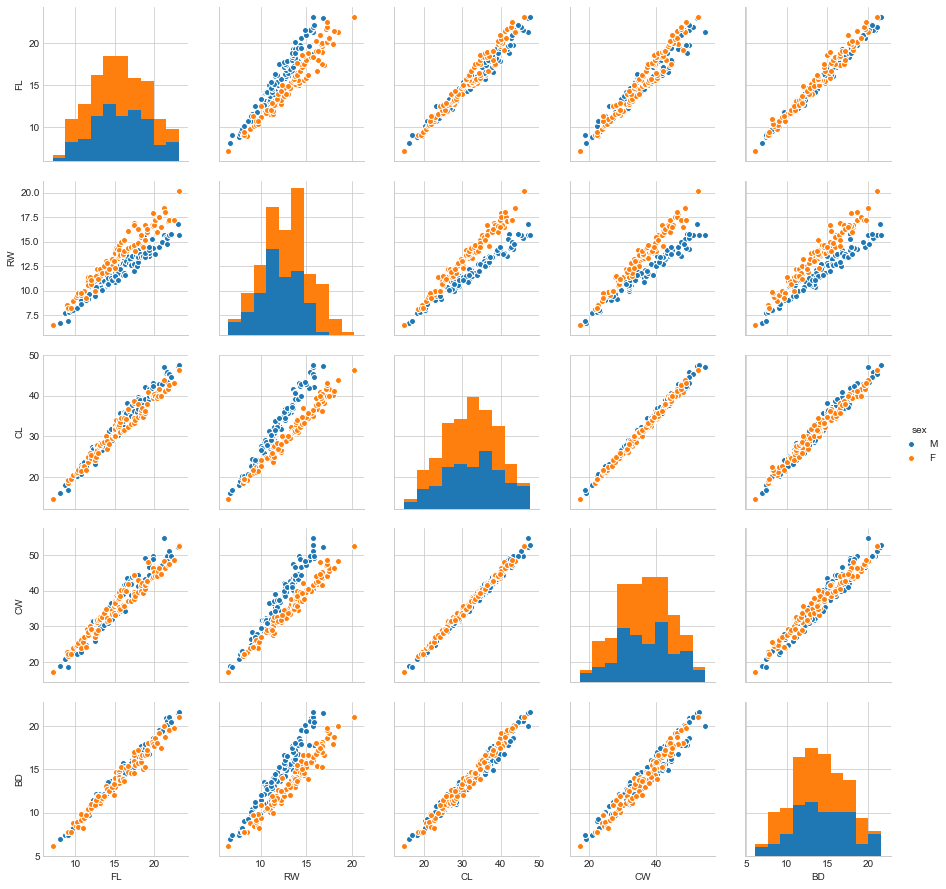

In [186]:
sns.pairplot(dfcrab, vars=["FL","RW","CL","CW","BD"], hue="sex")

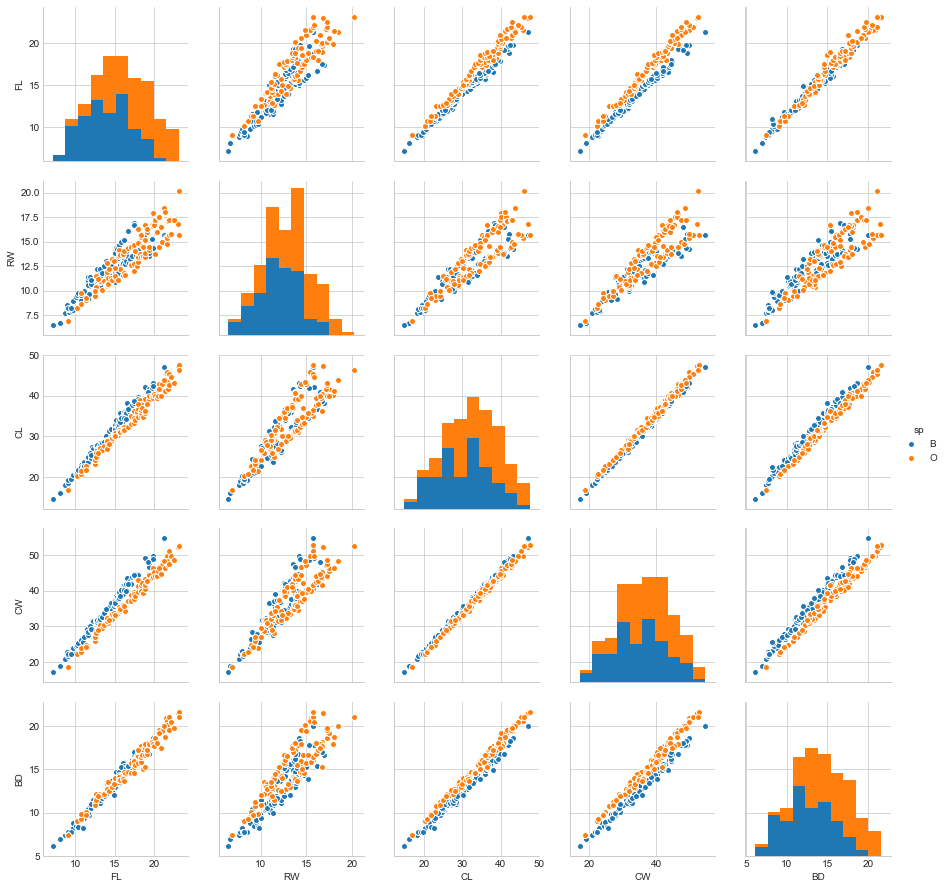

In [187]:
sns.pairplot(dfcrab, vars=["FL","RW","CL","CW","BD"], hue="sp")

In [188]:
# Binary transformation of variables

## category approach
## dfcrab['sp']=dfcrab['sp'].astype("category").cat.codes
## dfcrab['sex']=dfcrab['sex'].astype("category").cat.codes

## dictionary approach
replaceDict = {"sex": {"M": 0, "F": 1}, "sp": {"B": 1, "O": 0 }}
dfcrab.replace(replaceDict, inplace=True)

dfcrab.head()

,sp,sex,FL,RW,CL,CW,BD
0,1,0,8.1,6.7,16.1,19.0,7.0
1,1,0,8.8,7.7,18.1,20.8,7.4
2,1,0,9.2,7.8,19.0,22.4,7.7
3,1,0,9.6,7.9,20.1,23.1,8.2
4,1,0,9.8,8.0,20.3,23.0,8.2


In [189]:
# normalization (standardization) of the dataset:
# transformation of the data onto unit scale (mean=0 and variance=1)

print(dfcrab.describe())

dfcrabNormalized = (dfcrab - dfcrab.mean())/dfcrab.std()

dfcrabNormalized.describe()

               sp         sex          FL         RW          CL          CW  \
count  200.000000  200.000000  200.000000  200.00000  200.000000  200.000000   
mean     0.500000    0.500000   15.583000   12.73850   32.105500   36.414500   
std      0.501255    0.501255    3.495325    2.57334    7.118983    7.871955   
min      0.000000    0.000000    7.200000    6.50000   14.700000   17.100000   
25%      0.000000    0.000000   12.900000   11.00000   27.275000   31.500000   
50%      0.500000    0.500000   15.550000   12.80000   32.100000   36.800000   
75%      1.000000    1.000000   18.050000   14.30000   37.225000   42.000000   
max      1.000000    1.000000   23.100000   20.20000   47.600000   54.600000   

               BD  
count  200.000000  
mean    14.030500  
std      3.424772  
min      6.100000  
25%     11.400000  
50%     13.900000  
75%     16.600000  
max     21.600000  


,sp,sex,FL,RW,CL,CW,BD
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,3.330669e-18,-3.330669e-18,1.039169e-15,7.749357e-16,1.165734e-16,-4.751755e-16,2.073897e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.974969e-01,-9.974969e-01,-2.398346e+00,-2.424281e+00,-2.444942e+00,-2.453584e+00,-2.315628e+00
25%,-9.974969e-01,-9.974969e-01,-7.675967e-01,-6.755812e-01,-6.785379e-01,-6.243049e-01,-7.680803e-01
50%,0.000000e+00,0.000000e+00,-9.441182e-03,2.389890e-02,-7.725823e-04,4.897132e-02,-3.810472e-02
75%,9.974969e-01,9.974969e-01,7.057999e-01,6.067990e-01,7.191336e-01,7.095442e-01,7.502689e-01
max,9.974969e-01,9.974969e-01,2.150587e+00,2.899539e+00,2.176505e+00,2.310163e+00,2.210220e+00


## Performing PCA - whole dataset

After normalizing the dataframe, we use directly scikit-learn library.

In [133]:
from sklearn.decomposition import PCA
import numpy as np

X = dfcrabNormalized.copy()

pca = PCA()
X_r = pd.DataFrame(pca.fit(X).transform(X))

explained variance ratio: [  7.04732887e-01   1.59344249e-01   1.27908634e-01   5.27872597e-03
   1.58790552e-03   9.33322337e-04   2.14276005e-04]


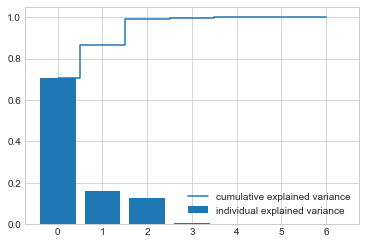

In [134]:
# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

# Plotting the Percentage of variance explained for each components

cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
pca_num_comp = len(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))

plt.bar(range(pca_num_comp), pca.explained_variance_ratio_, align='center',
            label='individual explained variance')
plt.step(range(pca_num_comp), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.legend(loc='best')

Only the first three components are relevant, therefore we could see how pairplots look like:

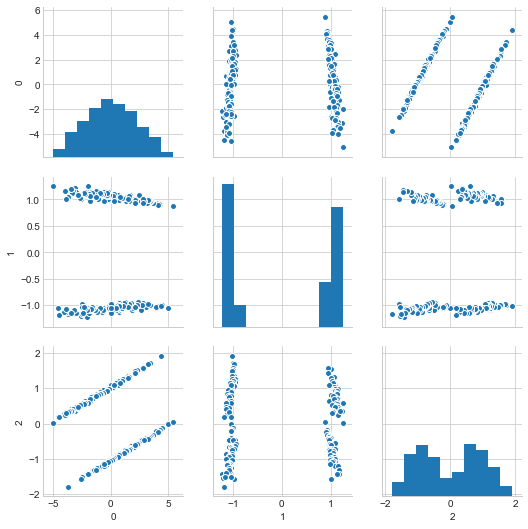

In [136]:
sns.pairplot(X_r, vars=[0,1,2])

### Interpreting the components

The previous plot shows that there are only three main directions to consider.

Since the new directions obtained from PCA are linear combination of the original variables, we may want to see the dependencies between old and new variables in order to interpret the results.



The component 0 is given by
0.188233539908 sp + 0.00410529498003 sex + -0.44774710982 FL + -0.419904422727 RW + -0.443127994611 CL + -0.438343459522 CW + -0.446370557178 BD

The component 1 is given by
-0.0166287347739 sp + 0.94488176443 sex + -0.0343307753191 FL + 0.29308486577 RW + -0.0951866792821 CL + -0.0667216954808 CW + -0.0795757952516 BD

The component 2 is given by
-0.959668164736 sp + -0.0156010404095 sex + 0.0276917108378 FL + -0.093643171789 RW + -0.141625966441 CL + -0.22139942897 CW + 0.0134953747916 BD

The component 3 is given by
-0.0317146885299 sp + -0.322334595927 sex + -0.219021771426 FL + 0.84574927414 RW + -0.182436339995 CL + -0.125760970974 CW + -0.287634100487 BD

The component 4 is given by
0.00779396057167 sp + -0.0144852976042 sex + 0.716076791205 FL + -0.052849165195 RW + -0.0220045115504 CL + 0.0509515926127 CW + -0.693606633366 BD

The component 5 is given by
-0.20255649951 sp + 0.0520042044619 sex + -0.486219421924 FL + -0.0995224090292 RW + 0.4245160

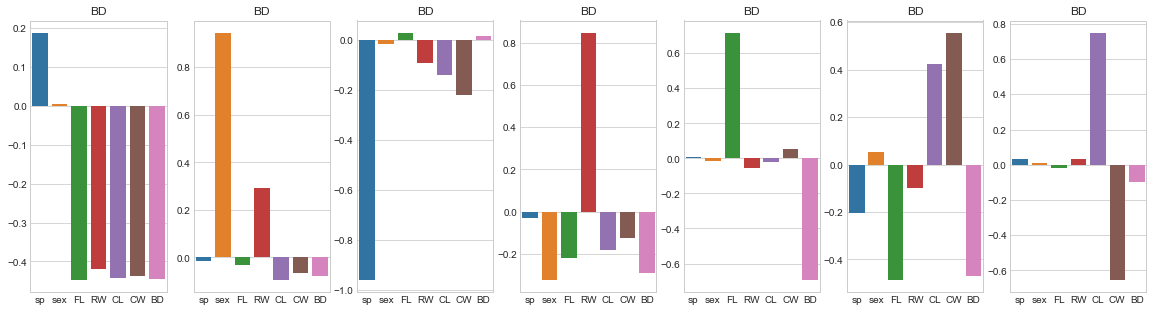

In [135]:
# Verbose way

outS = ''
for l in range(7):
    outS += "\n\nThe component "+str(l)+" is given by\n"+\
    ' + '.join([str(pca.components_[l][i])+' '+str(X.columns[i]) for i in range(7)])
print(outS)


# Graphic way
f, axes = plt.subplots(1, 7, figsize=(20,5))
j = 0

for i in pca.components_:
    #fig.add_subplot(1,j)
    sns.barplot(['sp', 'sex', 'FL', 'RW', 'CL', 'CW', 'BD'],i,ax=axes[j]).set_title(c)
    
    j+=1

While the second and the third new components are directly related with the *sex* and *species* feature, 
the first one is connected with the physical attributes of the crab. 
We can easily interpret this as a **cumulative physical feature**.

## PCA without gender and species

In [139]:
dfcrabNormalized.columns

Index(['sp', 'sex', 'FL', 'RW', 'CL', 'CW', 'BD'], dtype='object')

In [158]:
from sklearn.decomposition import PCA
import numpy as np

X = dfcrabNormalized[['FL', 'RW', 'CL', 'CW', 'BD']].copy()
Y = dfcrab[['sp', 'sex']].copy()

pca = PCA()
X_r = pd.DataFrame(pca.fit(X).transform(X))

explained variance ratio: [  9.57766957e-01   3.03370413e-02   9.32659482e-03   2.22707143e-03
   3.42335531e-04]


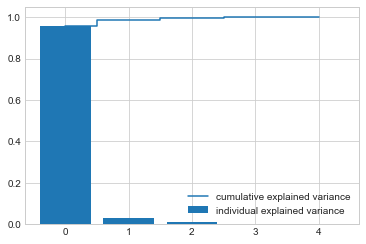

In [159]:
# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

# Plotting the Percentage of variance explained for each components

cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
pca_num_comp = len(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))

plt.bar(range(pca_num_comp), pca.explained_variance_ratio_, align='center',
            label='individual explained variance')
plt.step(range(pca_num_comp), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.legend(loc='best')

In [163]:
X_tot =X_r.merge(Y,left_index=True,right_index=True)
X_tot.head()

,0,1,2,3,4,sp,sex
0,4.915239,-0.267773,-0.121952,-0.039046,0.069295,1,0
1,4.375197,-0.093838,-0.039134,0.005454,-0.003045,1,0
2,4.118329,-0.168453,0.033559,0.038002,0.037966,1,0
3,3.873960,-0.245393,0.014465,0.019046,0.001312,1,0
4,3.824458,-0.223605,-0.015030,0.054497,-0.024822,1,0


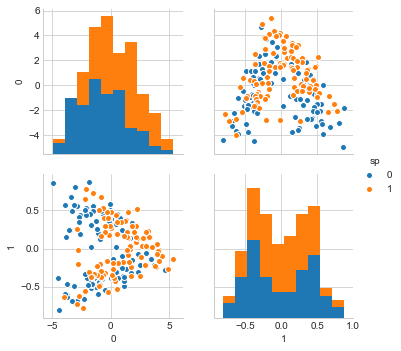

In [164]:
sns.pairplot(X_tot, vars=[0,1],hue="sp")

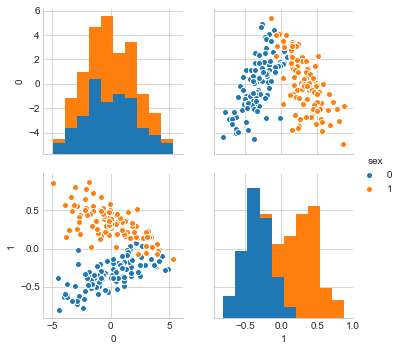

In [166]:
sns.pairplot(X_tot, vars=[0,1],hue="sex")

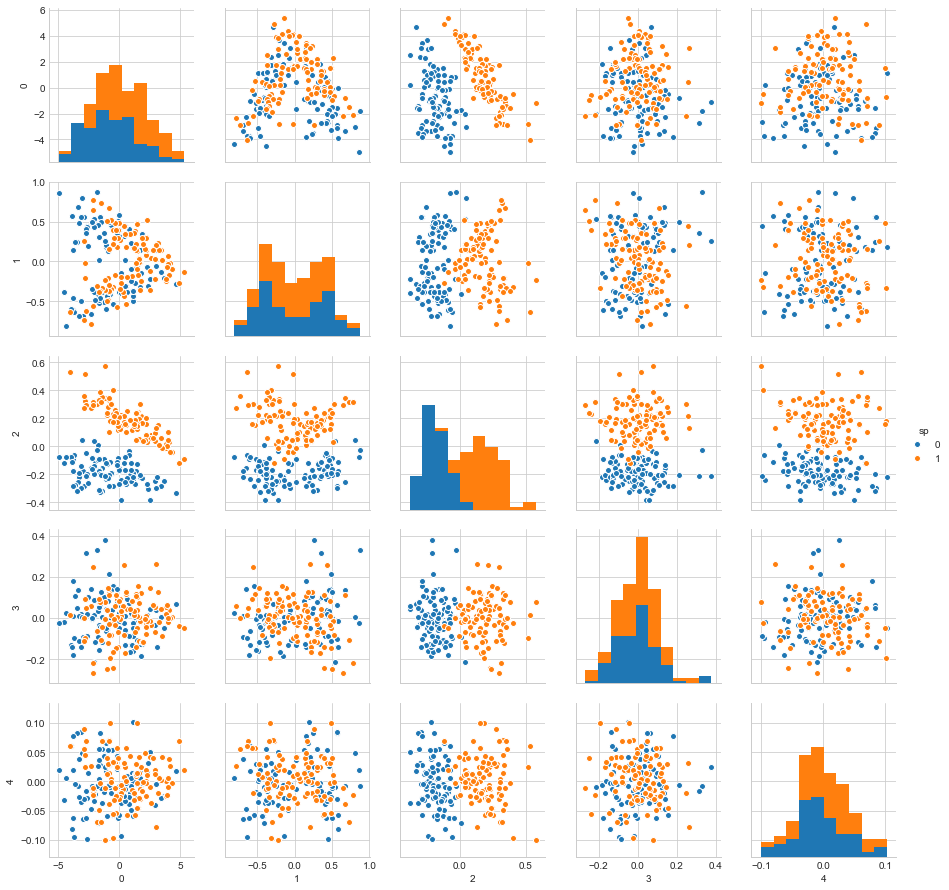

In [170]:
sns.pairplot(X_tot, vars=[0,1,2,3,4],hue="sp")

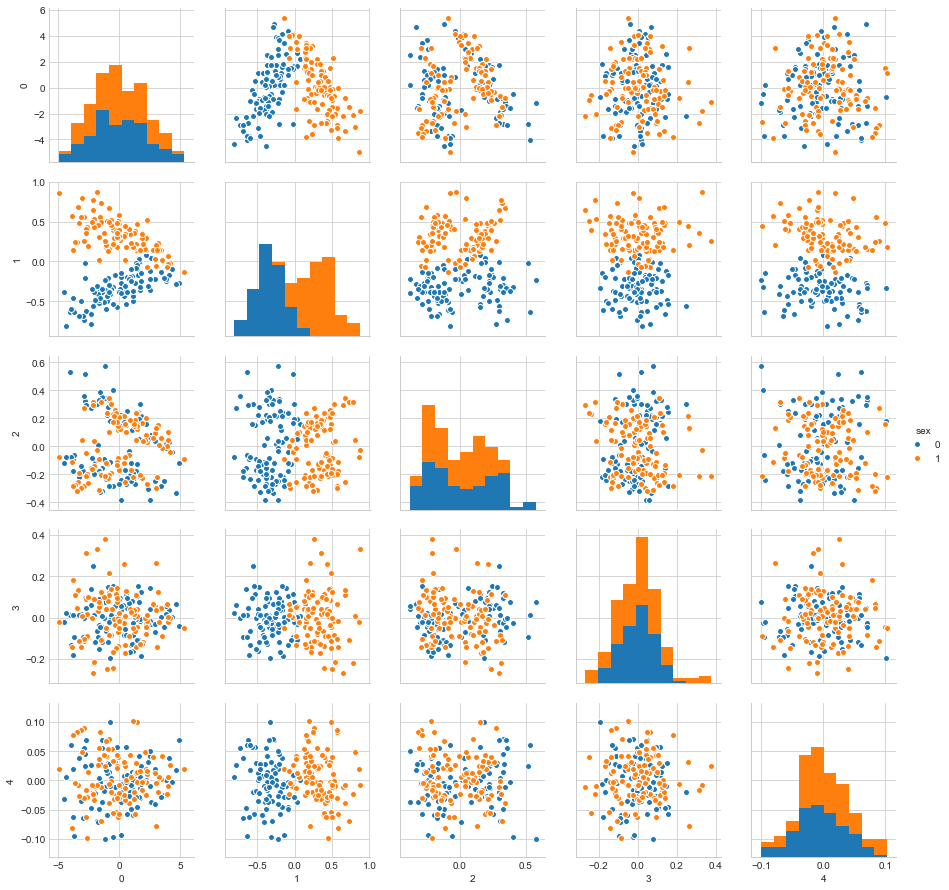

In [171]:
sns.pairplot(X_tot, vars=[0,1,2,3,4],hue="sex")

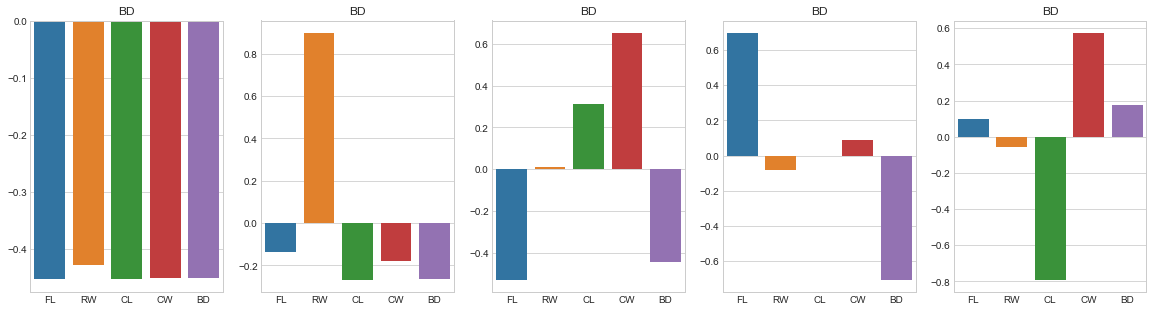

In [169]:
# Graphic way
f, axes = plt.subplots(1, 5, figsize=(20,5))
j = 0

for i in pca.components_:
    #fig.add_subplot(1,j)
    sns.barplot([ 'FL', 'RW', 'CL', 'CW', 'BD'],i,ax=axes[j]).set_title(c)
    
    j+=1

## PCA without  species

In [172]:
from sklearn.decomposition import PCA
import numpy as np

X = dfcrabNormalized[['sex','FL', 'RW', 'CL', 'CW', 'BD']].copy()
Y = dfcrab[['sp']].copy()

pca = PCA()
X_r = pd.DataFrame(pca.fit(X).transform(X))

explained variance ratio: [  7.98151014e-01   1.85890693e-01   8.07110498e-03   5.76414219e-03
   1.85129241e-03   2.71753273e-04]


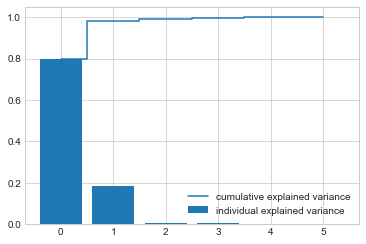

In [173]:
# Percentage of variance explained for each components
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

# Plotting the Percentage of variance explained for each components

cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
pca_num_comp = len(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4))

plt.bar(range(pca_num_comp), pca.explained_variance_ratio_, align='center',
            label='individual explained variance')
plt.step(range(pca_num_comp), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.legend(loc='best')

In [174]:
X_tot =X_r.merge(Y,left_index=True,right_index=True)
X_tot.head()

,0,1,2,3,4,5,sp
0,4.910769,-1.049059,-0.096548,-0.121746,-0.034305,0.077286,1
1,4.370786,-0.991231,0.043161,-0.243297,0.015053,0.011598,1
2,4.113896,-1.015259,0.082761,-0.147771,0.044877,0.049302,1
3,3.869505,-1.039295,0.037752,-0.089747,0.024058,0.009643,1
4,3.820011,-1.031610,0.018327,-0.119866,0.060400,-0.015274,1


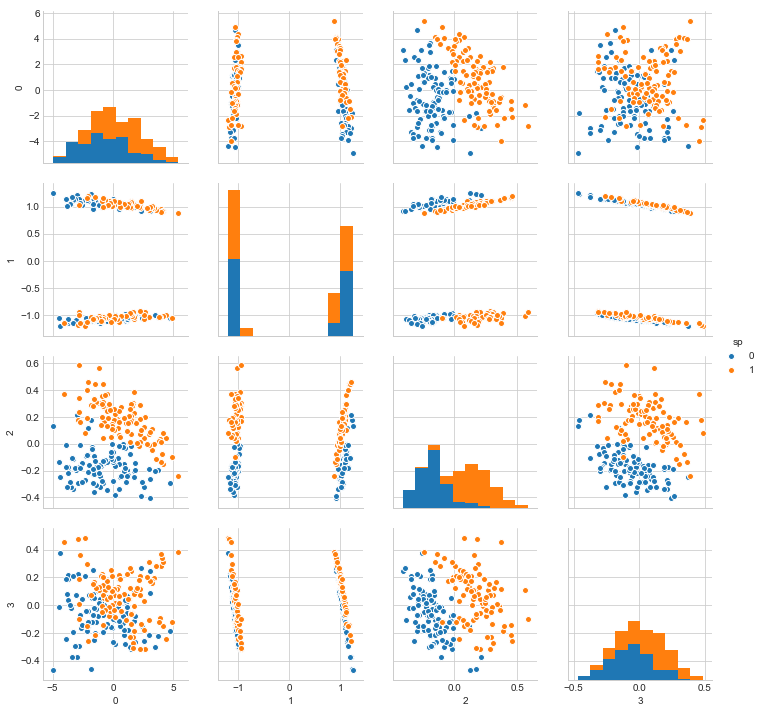

In [176]:
sns.pairplot(X_tot, vars=[0,1,2,3],hue="sp")

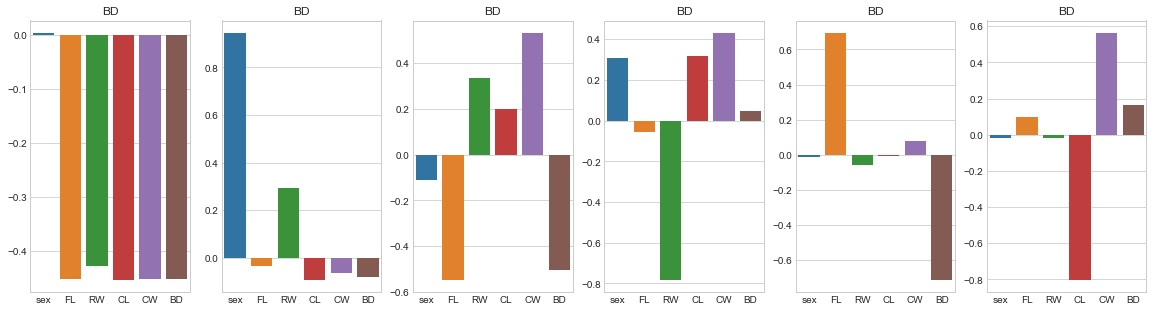

In [178]:
# Graphic way
f, axes = plt.subplots(1, 6, figsize=(20,5))
j = 0

for i in pca.components_:
    #fig.add_subplot(1,j)
    sns.barplot([ 'sex','FL', 'RW', 'CL', 'CW', 'BD'],i,ax=axes[j]).set_title(c)
    
    j+=1

## Decision Tree

This classification problem can be approached by using the Decision Tree method.

In [230]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



# Dividing the dataset in feature - observation

X = dfcrabNormalized[['FL', 'RW', 'CL', 'CW', 'BD','sex']].copy()
y = dfcrab['sp'].copy()

# Dividing the dataset in training-test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1, shuffle=True)


/Users/amezzali/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [231]:
# Creating and fitting the model

model = tree.DecisionTreeClassifier( criterion='gini', max_depth=None,\
            min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,\
            presort=False, random_state=None, splitter='best')

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [232]:
# Testing and scoring the model

y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

0.92000000000000004

Notes:

- The accuracy of $\sim 92\%$, obtained with a 75-25 split of the dataset between train and test is significantly higher than the guessing 50%-50%.

- By changing the split in 80-20 the accuracy grows to 95%, however the risk of overfitting grows as well, due to the small size of the dataset.

- the results obtained do not change by choosing gini Impurity or Entropy as impurity measure.

In [233]:
# Let's look at the confusion matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Blue', 'Predicted Orange'],
    index=['True Blue', 'True Orange']
)


,Predicted Blue,Predicted Orange
True Blue,21,2
True Orange,2,25


However, to be sure not to overfit we could perform a cross-validation scoring. We will see that the accuracy drops to $\sim77\%$.

In [298]:
# Let's evaluate the model using 5-fold cross-validation
from sklearn.cross_validation import cross_val_score

X = dfcrabNormalized[['FL', 'RW', 'CL', 'CW', 'BD','sex']].copy()
y = dfcrab['sp'].copy()


scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print(scores)
print(scores.mean())

[ 0.875  0.9    0.675  0.775  0.625]
0.77
